In [1]:
import numpy as np
from matplotlib import pyplot as plt
from pylab import rcParams
from math import sqrt

In [2]:
rcParams['figure.figsize'] = 12, 8

In [3]:
M = 100
s = .5
g = np.random.normal(size = M)

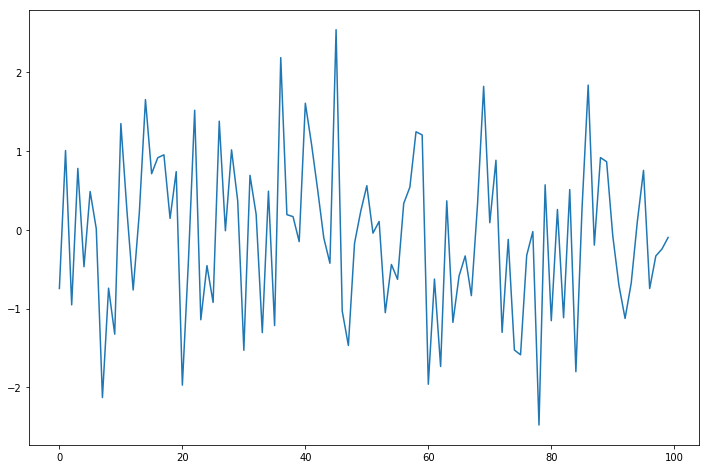

In [4]:
plt.plot(g)
plt.show()

In [5]:
b0 = [i for i in range(7, 0, -1)]
b = b0 + [0 for i in range(0, M - len(b0))]

In [6]:
B = []
for i in range(M):
    B.append(b[i:0:-1] + b[0:M - i])
B = np.array(B)

In [7]:
print(B)

[[7 6 5 ... 0 0 0]
 [6 7 6 ... 0 0 0]
 [5 6 7 ... 0 0 0]
 ...
 [0 0 0 ... 7 6 5]
 [0 0 0 ... 6 7 6]
 [0 0 0 ... 5 6 7]]


In [8]:
F = np.matmul(B, B.T)

In [9]:
x = np.matmul(B, g)

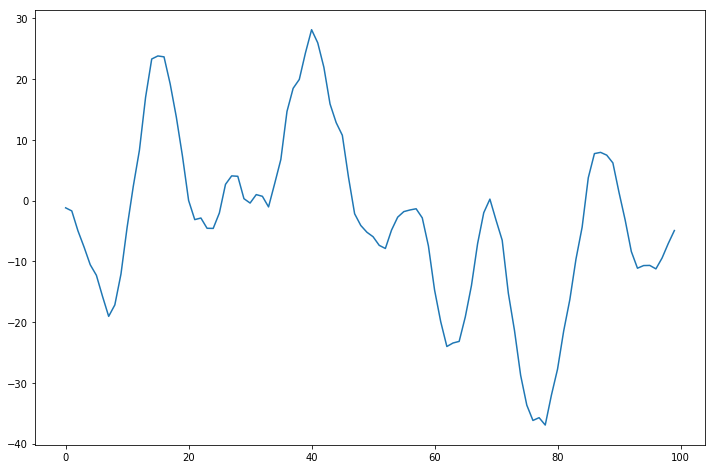

In [10]:
plt.plot(x)
plt.show()

In [11]:
d = 10
al = -d
ar = d
a = np.ones((1, ar - al + 1))

In [12]:
a = a / np.sum(a)

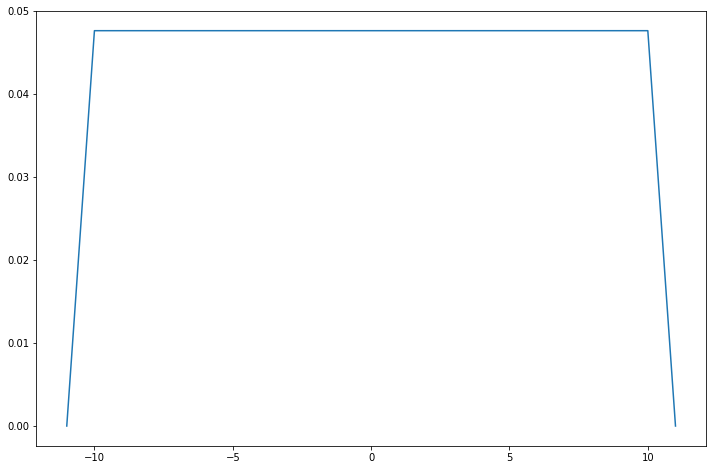

In [13]:
plt.plot([i for i in range(al - 1, ar + 2)], np.append(np.insert(a, 0, 0), 0))
plt.show()

In [14]:
N = M + ar - al
A = np.zeros((N, M))

In [15]:
for j in range(0, M):
    A[j + np.array([k for k in range(0, ar - al + 1)]), j] = a

In [16]:
y = np.matmul(A, x) + s * np.random.normal(size = N)

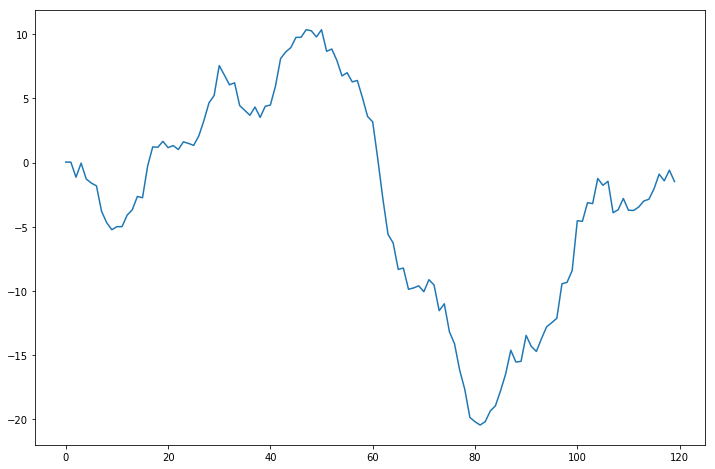

In [17]:
plt.plot(y)
plt.show()

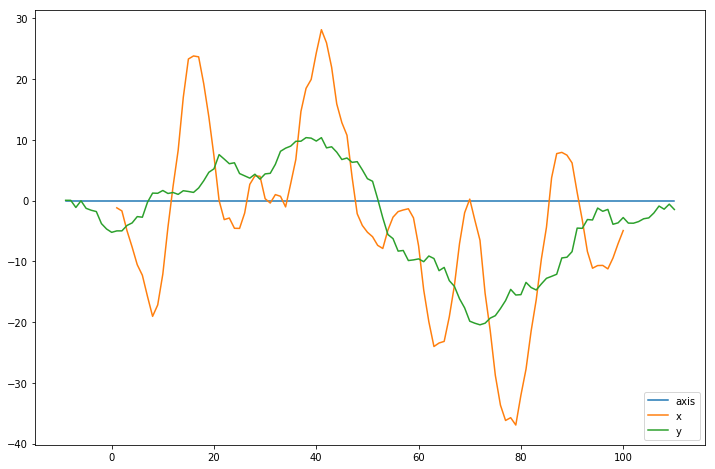

In [18]:
plt.plot([1 + al, M + ar],[0, 0], label='axis')
plt.plot([i for i in range(1, M + 1)], x, label='x')
plt.plot([i for i in range(1 + al, M + ar + 1)], y, label='y')
plt.legend(loc="lower right")
plt.show()

In [19]:
T = (1/s**2)*np.matmul(A.transpose(), A)

In [20]:
v = (1/s**2)*A.transpose().dot(y)

In [21]:
x_est = np.matmul(np.linalg.inv(T), v)

In [22]:
Q = np.linalg.inv(T)

In [23]:
x_std = np.sqrt(np.diagonal(Q))

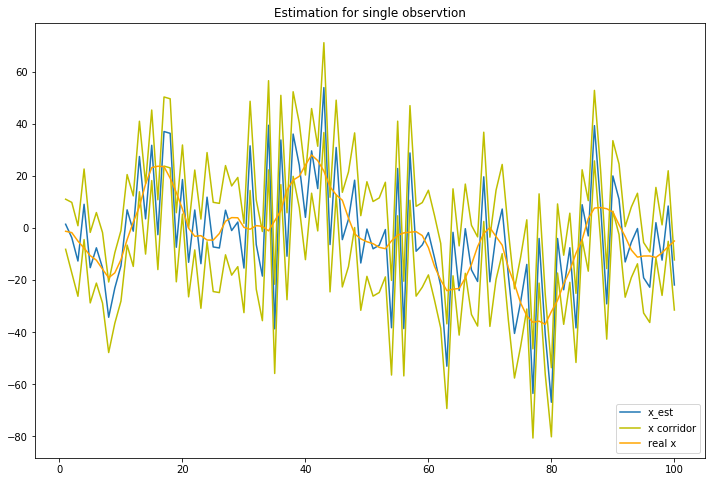

In [24]:
plt.plot([i for i in range(1, M + 1)], x_est, label='x_est')
plt.plot([i for i in range(1, M + 1)], x_est+x_std, color='y', label='x corridor')
plt.plot([i for i in range(1, M + 1)], x_est-x_std, color='y')
plt.plot([i for i in range(1, M + 1)], x, color='orange', label='real x')
plt.legend(loc="lower right")
plt.title('Estimation for single observtion')
plt.show()

In [25]:
T0 = np.linalg.inv(F)

In [26]:
T+=T0

In [27]:
x_est = np.matmul(np.linalg.inv(T), v)
Q = np.linalg.inv(T)
x_std = np.sqrt(np.diagonal(Q))

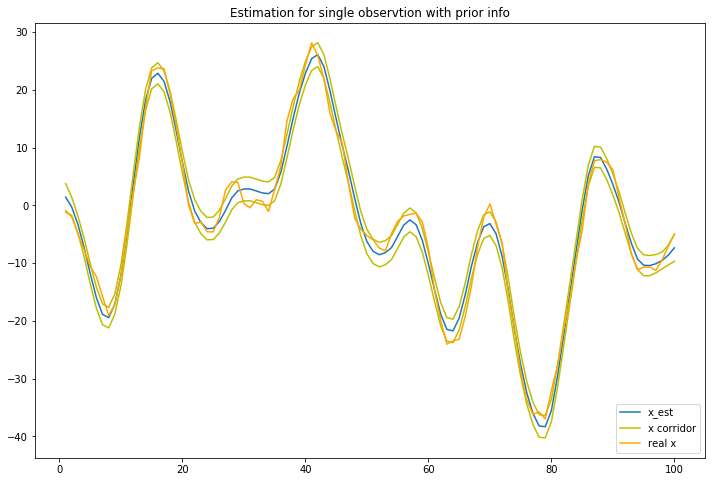

In [28]:
plt.plot([i for i in range(1, M + 1)], x_est, label='x_est')
plt.plot([i for i in range(1, M + 1)], x_est+x_std, color='y', label='x corridor')
plt.plot([i for i in range(1, M + 1)], x_est-x_std, color='y')
plt.plot([i for i in range(1, M + 1)], x, color='orange', label='real x')
plt.legend(loc="lower right")
plt.title('Estimation for single observtion with prior info')
plt.show()

In [29]:
multiple_ys = [np.matmul(A, x) + s * np.random.normal(size = N) for _ in range(10)]

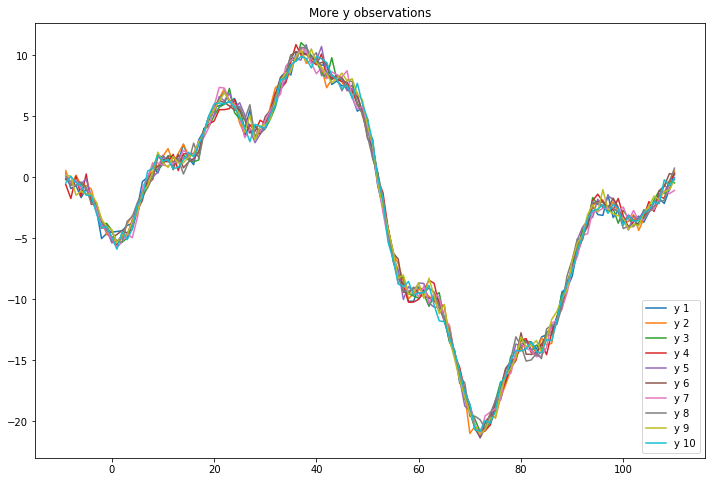

In [30]:
i = 1
for y_gen in multiple_ys:
    plt.plot([i for i in range(1 + al, M + ar + 1)], y_gen, label='y {}'.format(i))
    i+=1
plt.legend(loc="lower right")
plt.title('More y observations')
plt.show()

In [31]:
T_c = (1/s**2)*np.matmul(A.transpose(), A)
v_c = (1/s**2)*A.transpose().dot(multiple_ys[0])
for y_gen in multiple_ys[1:]:
    T_c += (1/s**2)*np.matmul(A.transpose(), A)
    v_c += (1/s**2)*A.transpose().dot(y_gen)

In [32]:
x_est = np.matmul(np.linalg.inv(T_c), v_c)
Q = np.linalg.inv(T_c)
x_std = np.sqrt(np.diagonal(Q))

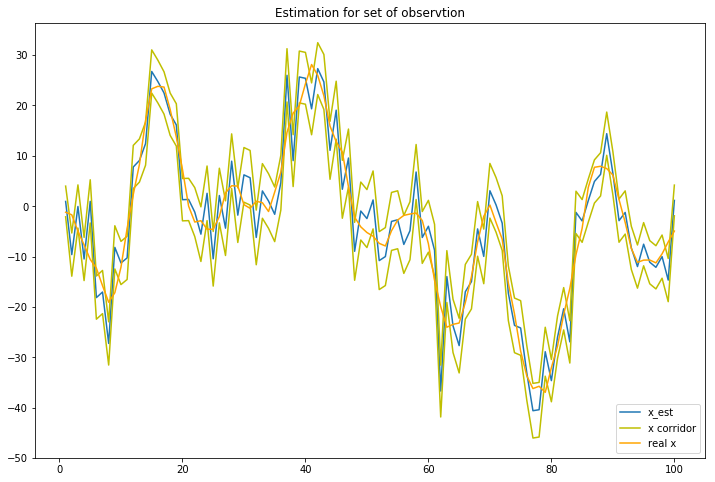

In [33]:
plt.plot([i for i in range(1, M + 1)], x_est, label='x_est')
plt.plot([i for i in range(1, M + 1)], x_est+x_std, color='y', label='x corridor')
plt.plot([i for i in range(1, M + 1)], x_est-x_std, color='y')
plt.plot([i for i in range(1, M + 1)], x, color='orange', label='real x')
plt.legend(loc="lower right")
plt.title('Estimation for set of observtion')
plt.show()

In [34]:
T_c+=T0

In [35]:
x_est = np.matmul(np.linalg.inv(T_c), v_c)
Q = np.linalg.inv(T_c)
x_std = np.sqrt(np.diagonal(Q))

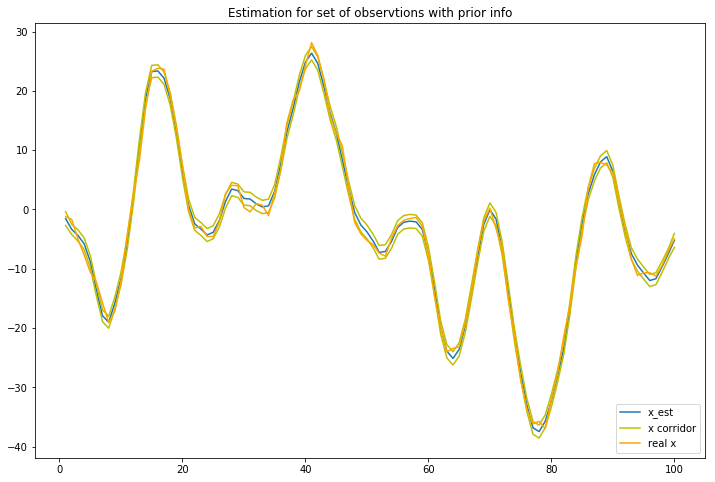

In [36]:
plt.plot([i for i in range(1, M + 1)], x_est, label='x_est')
plt.plot([i for i in range(1, M + 1)], x_est+x_std, color='y', label='x corridor')
plt.plot([i for i in range(1, M + 1)], x_est-x_std, color='y')
plt.plot([i for i in range(1, M + 1)], x, color='orange', label='real x')
plt.legend(loc="lower right")
plt.title('Estimation for set of observtions with prior info')
plt.show()